In [42]:
!pip install squarify

In [157]:
import pandas as pd
import matplotlib.pyplot as plt 
import squarify
from numpy import vectorize
from os.path import join

In [166]:
df = pd.read_csv(join('..','derivatives','0.4.joined','all_subject_level.csv'))['Major_TEXT'].dropna().value_counts()
df = pd.DataFrame(df).reset_index().rename(columns={'index':'major','Major_TEXT':'N'})

In [172]:
groups = {
    'Engineering':['engineering','electrical-engineering','aerospace-engineering','industrial-and-management-systems-engineering','mechanical-engineering','undecided-engineering'],
    'Physical Science':['chemistry','biology','forensic-science'],
    'Math':['mathematics','statistics'],
    'Computer Science':['computer-science','information-technology','infortmation-technology'],
    'Business':['accounting','finance','business','bussiness','hospitality','hospitality-management','management','entertainment-management'],
    'Medical Science':['biomedical','biomedical-science','health-science','nursing','pre-nursing','sports-and-exercise-science'],
    'Social Science':['communications','psychology','political-science']
}

In [173]:
df.head()

,major,N,MAJOR
0,health-science,9,Medical Science
1,psychology,6,Social Science
2,biomedical-science,5,Medical Science
3,nursing,4,Medical Science
4,mechanical-engineering,3,Engineering


In [174]:
def categorize_majors(major,groups):
    major_group = 'Other'
    for g in groups.keys():
        if major in groups[g]:
            major_group = g
    return(major_group)

In [175]:
df['MAJOR']=vectorize(categorize_majors)(df.major,groups)

In [187]:
df.to_csv(join('..','derivatives','data_update_1','majors.csv'),index=False)

In [176]:
df[df['MAJOR'] == 'Other']

,major,N,MAJOR
19,film,1,Other
26,emerging-media,1,Other
27,architecture,1,Other
28,english,1,Other
30,graphic-design,1,Other


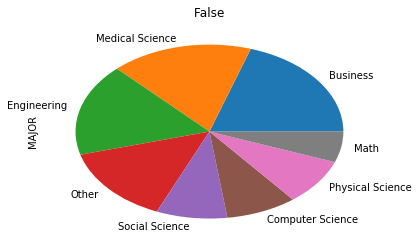

In [191]:
df['MAJOR'].value_counts().plot.pie()

In [189]:
df['MAJOR'].value_counts().to_csv(join('..','derivatives','data_update_1','major_groups.csv'))